# Exercise 1 – TensorFlow Basics

# Requirements:

- [Google Colab](https://colab.research.google.com/)

If running locally:

- [NumPy](https://numpy.org/doc/stable/user/quickstart.html)
- [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [TensorFlow 2](https://www.tensorflow.org/tutorials)
- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html)

# Objectives:

- Getting started with Google Colab.
- Going through TensorFlow basics.
- Introduction to machine learning.
- Implementing a linear regression using TensorFlow.

# Introduction

In this lecture we start with a brief introduction on Google Colab which allows you to write and execute Python in your browser. Further we provide an introduction to TensorFlow and review some basics. We then start implementing a simple machine-learning (ML) model using TensorFlow. Finally, we utilize the materials in this lecture for solving a real-world problem.

# 1. Google Colab


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more!

Colaboratory is built on top of Jupyter Notebook. Jupyter notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

Text(0.5, 1.0, 'Sample Visualization')

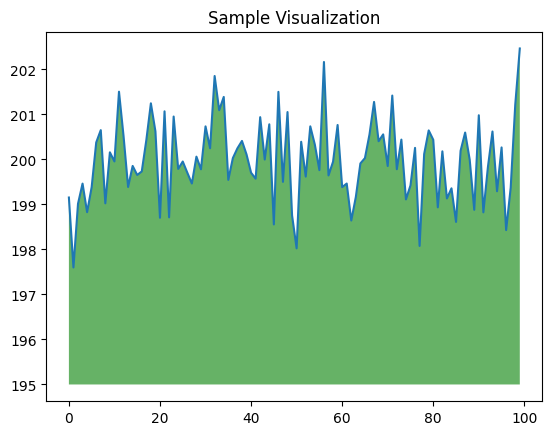

In [1]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")


## System aliases

Jupyter includes shortcuts for common operations, such as ls:

In [2]:
!ls .

sample_data


In [3]:
!nvidia-smi

Fri Apr 25 11:03:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [4]:
# https://pypi.python.org/pypi/pydot
# !pip install pydot
# import pydot

## Using Google Colab with GitHub

### Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.



## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vg_2.drawio.png to vg_2.drawio.png
User uploaded file "vg_2.drawio.png" with length 19394 bytes


## Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.


In [7]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Mounting Google Drive locally

The example below shows how to mount your Google Drive on your runtime using an authorization code, and how to write and read files there. Once executed, you will be able to see the new file (`foo.txt`) at [https://drive.google.com/](https://drive.google.com/).


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
wdir = '/content/drive/MyDrive/ADL/Lecture_01/'

In [12]:
with open(f'{wdir} foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/MyDrive/ADL/Lecture_01/foo.txt

Hello Google Drive!

In [13]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


# Tensorflow with GPU

Here, we will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [14]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [15]:
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print(gpus)
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Go to Edit -> Notebook settings -> Select GPU as Hardware accelerator.

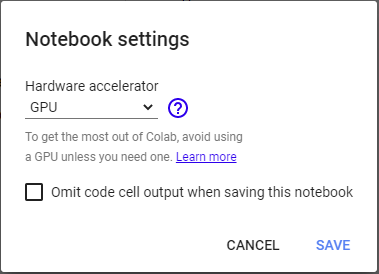

Now check the availability again.

In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Choose your device for computation. CPU or one of your CUDA devices

In [17]:
tf.config.set_visible_devices(gpus, 'GPU')

# 2. TensorFlow basics.

```
# Requires the latest pip
pip install --upgrade pip

# Current stable release for CPU and GPU
pip install tensorflow
```

## Overview of Concepts

TensorFlow gets its name from **tensors**, which are arrays of arbitrary dimensionality. Using TensorFlow, you can manipulate tensors with a very high number of dimensions. That said, most of the time you will work with one or more of the following low-dimensional tensors:

  * A **scalar** is a 0-d array (a 0th-order tensor).  For example, `"Howdy"` or `5`
  * A **vector** is a 1-d array (a 1st-order tensor).  For example, `[2, 3, 5, 7, 11]` or `[5]`
  * A **matrix** is a 2-d array (a 2nd-order tensor).  For example, `[[3.1, 8.2, 5.9][4.3, -2.7, 6.5]]`

TensorFlow **operations** create, destroy, and manipulate tensors.  Most of the lines of code in a typical TensorFlow program are operations.

A TensorFlow **graph** (also known as a **computational graph** or a **dataflow graph**) is, yes, a graph data structure.  A graph's nodes are operations (in TensorFlow, every operation is associated with a graph).  Many TensorFlow programs consist of a single graph, but TensorFlow programs may optionally create multiple graphs. A graph's nodes are operations; a graph's edges are tensors. Tensors flow through the graph, manipulated at each node by an operation. The output tensor of one operation often becomes the input tensor to a subsequent operation. TensorFlow implements a **lazy execution model,** meaning that nodes are only computed when needed, based on the needs of associated nodes.

Tensors can be stored in the graph as **constants** or **variables**. As you might guess, constants hold tensors whose values can't change, while variables hold tensors whose values can change. However, what you may not have guessed is that constants and variables are just more operations in the graph. A constant is an operation that always returns the same tensor value. A variable is an operation that will return whichever tensor has been assigned to it.

To define a constant, use the `tf.constant` operator and pass in its value. For example:

## Tensors

Let us create a tensorflow tensor:

In [ ]:
a = tf.constant([[1.0, 1.0],
                 [1.0, 1.0]])

a

and find out what the properties of this tensor 'a' are.

In [ ]:
# convert the tensor to a numpy array and print its size again
a_numpy = a.numpy()
a_numpy.shape

In [ ]:
a.shape

Let's create another tensor and do a few basic math operation.

In [ ]:
b = tf.random.uniform([2, 2])

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

In [ ]:
# or
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

Now, let's do the following operations on tensor 'a'.
**Note:** Do not convert the tensors to NumPy.

In [ ]:
a = tf.random.uniform([10, 10])
tf.reduce_sum(a)

In [ ]:
tf.argmax(a, axis = 1)

In [ ]:
x = np.linspace(-np.pi, np.pi, 90)
x = tf.constant(x)
x

In [ ]:
y = tf.sin(x)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
ax.plot(x, y)
ax.set_xlabel('$x$')
ax.set_ylabel('$sin(x)$')

## Variables
A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like tf.keras use tf.Variable to store model parameters.

In [ ]:
numpyarray = np.arange(10).reshape(2, 5)
# create a tensorflow variable
a = tf.Variable(numpyarray, dtype=tf.float32)

## Differentiation

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()


In [ ]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])

print(w)
print(dl_dw)


In [ ]:
x = tf.linspace(-np.pi, np.pi, 90)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.sin(x)

dy_dx = tape.gradient(y, x)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
ax.plot(x, y, label = 'y')
ax.plot(x, dy_dx, label='dy/dx')

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### Placing variables

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible, however, you can override this.

In [ ]:
with tf.device('CPU:0'):
  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = a @ b

print(c)

In [ ]:
# TODO create two tf.variables using device 'CPU:0' and do matrix multiplication on device 'GPU:0'
with tf.device('CPU:0'):
    # Create some tensors
    a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.Variable([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

with tf.device('GPU:0'):
    c = a @ b

print(c)



NameError: name 'tf' is not defined

# 3. Linear regression via TensorFlow.

## Loading the flood dataset

In [ ]:
import pandas as pd
wdir = '/content/drive/My Drive/ADL/Lecture_01/'
data = pd.read_csv(wdir + 'Flood_Data.csv', delimiter=';')

data.dropna(axis=1, inplace=True)
data.drop(columns=data.keys()[:4], inplace=True)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ADL/Lecture_01/Flood_Data.csv'


## Inspect the data
Let us plot 1000 samples of the data:

In [ ]:
data_b = data[1000:2000]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].plot(data_b[data_b.keys()[0]])
ax[0, 1].plot(data_b[data_b.keys()[1]])

ax[0, 0].set_title(data_b.keys()[0])
ax[0, 1].set_title(data_b.keys()[1])
ax[0, 0].set_ylabel('Water level')
ax[0, 1].set_ylabel('Mass flow rate')

ax[1, 0].plot(data_b[data_b.keys()[2]])
ax[1, 1].plot(data_b[data_b.keys()[3]])

ax[1, 0].set_title(data_b.keys()[2])
ax[1, 1].set_title(data_b.keys()[3])
ax[1, 0].set_ylabel('Water level')
ax[1, 1].set_ylabel('Mass flow rate')
ax[1, 0].set_xlabel('Index')
ax[1, 1].set_xlabel('Index')
plt.tight_layout()

NameError: name 'data' is not defined

Moreover, it is beneficial to plot the pairwise correlation of the variables to see how they are correlated.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [ ]:
corr = data.corr()

# plot the correlation matrix using pyplot.imshow

f, ax = plt.subplots(1, 1)
c = ax.imshow(corr)
ax.set_xticks(np.arange(len(data.columns)))
ax.set_yticks(np.arange(len(data.columns)))
f.colorbar(c)
ax.set_title('Correlation Matrix')


Another interesting plot that may give you a good understanding about the complexity of the dataset is the pairwise relationships. We can use *seaborn* library as below.

In [ ]:
import seaborn as sns
sns.pairplot(data, diag_kind='kde')

## Split the data to inputs and outputs

In this task, we consider the data from Margarethenklippe, i.e. the first two columns, as the input and look for a linear mapping that gives the information about the Sennhuette as the output.
Therefore, we have:

In [ ]:
X = data[[' MargarethenklippeMin15W', ' MargarethenklippeMin15Q']].astype(np.float32)
y = data[[' SennhuetteMin15W', ' SennhuetteMin15Q']].astype(np.float32)

In [ ]:
print(X.describe().transpose())
print(y.describe().transpose())

## Training/validation data and normalization

Let's consider 80% of the data for training and 20% for validation:


In [ ]:
# shuffle the samples
idx = np.arange((len(X)))
np.random.shuffle(idx)
X = X.iloc[idx]
y = y.iloc[idx]

In [ ]:
# split data to train and validation
N_train = int(0.8 * len(X))
x_train, x_test, y_train, y_test = X.iloc[:N_train], X.iloc[N_train:], y.iloc[:N_train], y.iloc[N_train:]

In the table of statistics it's easy to see how different the ranges of each feature are. It is good practice to normalize features that use different scales and ranges.

In [ ]:
# Normalize both input and the output using the statistics (mean and std) of the training data
def standardize(x):
    mu = x.mean(0)
    std = x.std(0)
    return mu, std, (x - mu)/std

mu_x, std_x, x_train = standardize(x_train)
mu_y, std_y, y_train = standardize(y_train)

x_test = (x_test - mu_x)/std_x
y_test = (y_test - mu_y)/std_y



## Linear regression

Let's build and train a linear regressor as:
\begin{equation}
y = \mathbf{w}X + \mathbf{b}
\end{equation}
where $\mathbf{w}$ and $\mathbf{b}$ are the weight and bias, respectively. We need to do the following steps:
 - Create the model by initializing the weight and bias using tf.Variable
 - Define the loss function. We will use mean squared error (MSE) as the loss function.
 - Train the model. We will use stochastic gradient descent (SGD) as the optimizer to minimize the loss.

Let's implement our linear regression model using TensorFlow Subclassing API:

### Create a model

In [ ]:
class LinearRegressor(tf.keras.Model):
    """
    Linear regression model
    inherits the tf.keras.Model.
    """
    def __init__(self):
        """ Initializes internal Model state. """
        super(LinearRegressor, self).__init__()

        # define linear layer for the model
        input_dim = 2
        output_dim = 2
        self.W = tf.Variable(tf.random.normal((input_dim, output_dim)))
        self.b = tf.Variable(tf.zeros(output_dim))

        # Define the optimizer. In this case, we use Stochastic Gradient Descent (SGD).
        self.optimizer = tf.optimizers.SGD(learning_rate=0.1)


    def loss_fn(self, y_pred, y_true):
        """ Define loss function """
        # TODO compute the loss
        return tf.reduce_mean(tf.square(y_pred - y_true))


    def call(self, inputs):
        """ Defines the computation performed at every call. """
        # run the data through the layer
        return tf.matmul(inputs, self.W) + self.b

    def train_step(self, data):
        """ Defines the computation performed at one step of training.
            This typically includes the:
            - forward pass
            - loss calculation
            - backpropagation
            - metric updates.
        """
        x_batch, y_batch = data

        # compute the gradients and update the weights
        with tf.GradientTape() as tape:
            y_pred = self(x_batch, training=True)
            loss = self.loss_fn(y_batch, y_pred)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        return {"loss": loss}

    def test_step(self, data):
        """ Defines the computation performed at one step of evaluation.
            This typically includes the:
            - forward pass
            - loss calculation
            - metric updates.
        """
        x_batch, y_batch = data
        y_pred = self(x_batch, training=False)
        loss = self.loss_fn(y_batch, y_pred)
        return {"loss": loss}


## Instantiate the model

In [ ]:
# instantiate the model
model = LinearRegressor()

## Train the model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the input data.
- Then the loss (or error) needs to be computed by comparing the prediction to the reference data.
- In the backward pass, the model learns and updates its weights based on the current gradient.

In [ ]:
batch_size = 2048
num_epochs = 10

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

train_losses = []
test_losses = []
# Training loop
for epoch in range(num_epochs):
    # Train loop
    train_loss = tf.keras.metrics.Mean()
    for x_batch, y_batch in train_dataset:
        train_loss(model.train_step((x_batch, y_batch))["loss"])
    train_losses.append(train_loss.result())

    # Test loop
    test_loss = tf.keras.metrics.Mean()
    for x_batch, y_batch in test_dataset:
        test_loss(model.test_step((x_batch, y_batch))["loss"])
    test_losses.append(test_loss.result())

    # Print progress
    print(f"Epoch {epoch + 1}: train loss = {train_losses[-1]:.4f}, test loss = {test_losses[-1]:.4f}")


## Plot the training and validation error

Create a plot using pyplot that contains both the losses on training set and the losses on the validation set.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [ ]:
# visualize the model's training progress
f, ax = plt.subplots(1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(test_losses, label = 'test loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE loss')
ax.legend()


## Plot predictions vs reference data

Create a plot in which both of the predictions and the reference data are illustrated for one of the output variables with respect to one of the input variables.
Use scatter plot to show the reference data and line plot to show the predictions.

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [ ]:
# visualize the predicted values vs the reference data for one of the outputs
y_pred = model(x_test).numpy()

f, ax = plt.subplots(1, 1)
ax.scatter(x_test.iloc[:, 0], y_test.iloc[:, 0], label = 'reference', c='tab:blue')
ax.scatter(x_test.iloc[:, 0], y_pred[:, 0], label = 'prediction', color='tab:red')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()